In [1]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/nature_tracking_dataset/tracking_data.csv', encoding = "utf-8")

In [3]:
df.head()

,ant,frame,video,colony,date,t,x,y
0,2,15405,1,1,1/11/17,20:12:17,1812,360
1,2,15406,1,1,1/11/17,20:12:17,1808,368
2,2,15407,1,1,1/11/17,20:12:17,1804,368
3,2,15408,1,1,1/11/17,20:12:17,1804,368
4,2,15409,1,1,1/11/17,20:12:17,1800,372


In [4]:
df = df.loc[df['video'] == 1]
df = df.loc[df['colony'] == 1]


In [5]:
def draw_box(frame, x, y):    
    img = Image.fromarray(frame).convert('RGB')
    draw = ImageDraw.Draw(img)
    draw.ellipse([x-10, y-10, x + 10, y + 10], fill=(255, 255, 255))
    
    return np.asarray(img)

In [6]:
def convert_video_to_frames(read_path, select_frame):
    vidcap = cv2.VideoCapture(read_path)
    vidcap.set(cv2.CAP_PROP_POS_FRAMES,select_frame)
    success, image = vidcap.read()
    return image


In [7]:
video_path = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/nature_tracking_dataset/jan11_vid1.MP4'
frame = convert_video_to_frames(video_path, 50)

In [27]:
def one_pass(index):
    frame_index = df.iloc[index]['frame']
    x = df.iloc[index]['x']
    y = df.iloc[index]['y']
    print(frame_index)
    print(x)
    print(y)
    frame = convert_video_to_frames(video_path, frame_index)
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    frame = draw_box(frame, x, y)
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    
    

In [28]:
df.shape

(54889, 8)

15406
1808
368


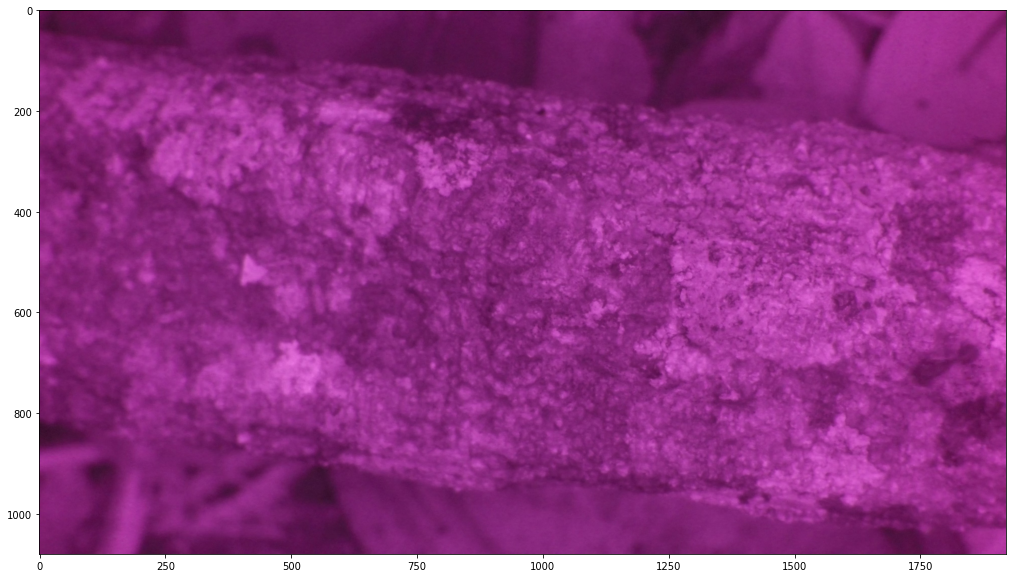

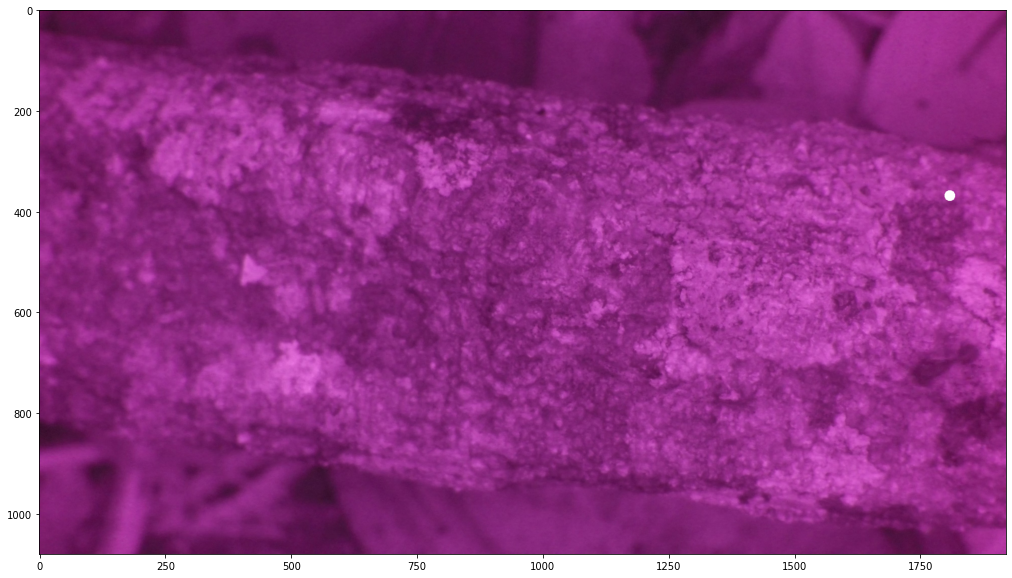

In [29]:
one_pass(1)

In [ ]:
# frame = convert_video_to_frames(video_path, 1)
# x, y = 1548,608
# frame = draw_box(frame, x, y)
# plt.figure(figsize=(20,10))
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))